In [18]:
#https://okan.cloud/posts/2021-04-08-text-vectorization-using-python-term-document-matrix/
# Import pandas for dataframe 
# Import pprint for printing the outcomes 
import pandas as pd 
import numpy as np
from pprint import pprint 

# Import train_rel_2.tsv into Python
with open('train_rel_2.tsv', 'r') as f:
    lines = f.readlines()
    columns = lines[0].split('\t')
    data = []
    response_id= []
    score = []
    for line in lines[1:]:
        temp = line.split('\t')
        if temp[1] == '1':
            data.append(temp[-1])
            response_id.append(int(temp[0]))
            score.append(int(temp[2]))
        else: 
            None

# Construct a dataframe ("doc") which includes the response_id, responses, and the score        
doc = pd.DataFrame(list(zip(response_id, data, score)))
doc.columns = ['id', 'response', 'score']

In [19]:
## Preview the first response in the data set
print('Sample response 1:')
pprint(doc.response.values[0]) 

# Preview the first 5 lines in the data set
doc.head(5)

Sample response 1:
('Some additional information that we would need to replicate the experiment '
 'is how much vinegar should be placed in each identical container, how or '
 'what tool to use to measure the mass of the four different samples and how '
 'much distilled water to use to rinse the four samples after taking them out '
 'of the vinegar.\n')


,id,response,score
0,1,Some additional information that we would need...,1
1,2,"After reading the expirement, I realized that ...",1
2,3,"What you need is more trials, a control set up...",1
3,4,The student should list what rock is better an...,0
4,5,For the students to be able to make a replicat...,2


In [20]:
# Activate CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Count Vectorizer
vect = CountVectorizer()  
vects = vect.fit_transform(doc.response)

HowManyDocs = 10

# Select the first five rows from the data set
td = pd.DataFrame(vects.todense()).iloc[:HowManyDocs]  
td.columns = vect.get_feature_names()
term_document_matrix = td.T
term_document_matrix.columns = ['Doc '+str(i) for i in range(1, HowManyDocs+1)]
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

# Top 25 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:25] 

# Print the first 15 rows 
print(term_document_matrix.drop(columns=['total_count']).head(15))

             Doc 1  Doc 2  Doc 3  Doc 4  Doc 5  Doc 6  Doc 7  Doc 8  Doc 9  \
the              5      5      1      3      2      3     10      6      6   
to               5      2      1      0      3      0      4      6      4   
of               2      1      1      0      1      2      2      4      1   
need             1      1      1      0      1      1      1      4      3   
you              0      3      2      0      0      1      1      4      3   
and              1      1      2      1      1      1      1      1      0   
is               1      1      1      2      2      0      1      0      2   
would            1      0      0      0      1      2      1      4      1   
how              3      0      0      0      1      0      0      1      3   
what             1      0      1      2      1      1      0      1      0   
samples          2      0      0      0      0      1      2      2      0   
information      1      1      0      0      0      1      1    

<AxesSubplot:>

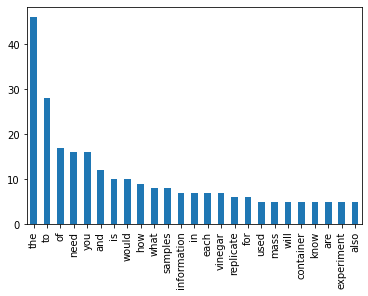

In [21]:
term_document_matrix['total_count'].plot.bar()

In [22]:
# Locate the and to in the documents
term_document_matrix.loc[['the', 'to']].T

# Create a scatterplot of the frequencies

,the,to
Doc 1,5,5
Doc 2,5,2
Doc 3,1,1
Doc 4,3,0
Doc 5,2,3
Doc 6,3,0
Doc 7,10,4
Doc 8,6,6
Doc 9,6,4
Doc 10,5,3


<AxesSubplot:xlabel='the', ylabel='to'>

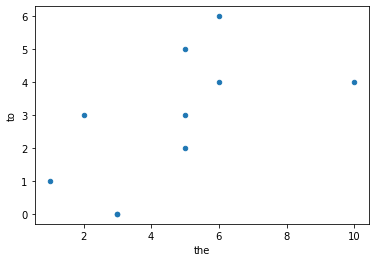

In [23]:
term_document_matrix.drop(columns=['total_count']).T.plot.scatter(x='the', y='to')

In [24]:
# Activate math
import math

# Define a cosine similarity function
def cosine_similarity(a,b):
    "compute cosine similarity of v1 to v2: (a dot b)/{||a||*||b||)"
    sumxx, sumxy, sumyy = 0, 0, 0
    for i in range(len(a)):
        x = a[i]; y = b[i]
        sumxx += x*x
        sumyy += y*y
        sumxy += x*y
    return sumxy/math.sqrt(sumxx*sumyy)

In [25]:
# Activate numpy
import numpy as np 

# Save the similarity index between the documents
def pair(s):
    for i, v1 in enumerate(s):
        for j in range(i+1, len(s)):
            yield [v1, s[j]]


documents = list()
for i in range(1,11):
    documents.append("Doc " + str(i))
#documents
#print(len(documents))

dic={} 
for (a,b) in list(pair(documents)):
  dic[(a,b)] = cosine_similarity(term_document_matrix[a].tolist(), term_document_matrix[b].tolist())

# Print the cosine similarity index
pprint(dic)

{('Doc 1', 'Doc 10'): 0.7404908101339982,
 ('Doc 1', 'Doc 2'): 0.7369886027879209,
 ('Doc 1', 'Doc 3'): 0.553996261682467,
 ('Doc 1', 'Doc 4'): 0.528814613424173,
 ('Doc 1', 'Doc 5'): 0.7815646956547972,
 ('Doc 1', 'Doc 6'): 0.6049494651800982,
 ('Doc 1', 'Doc 7'): 0.8128564804830193,
 ('Doc 1', 'Doc 8'): 0.8154060910266203,
 ('Doc 1', 'Doc 9'): 0.7426657143690903,
 ('Doc 2', 'Doc 10'): 0.7529232524210427,
 ('Doc 2', 'Doc 3'): 0.6882472016116853,
 ('Doc 2', 'Doc 4'): 0.6226998490772391,
 ('Doc 2', 'Doc 5'): 0.5998866106008962,
 ('Doc 2', 'Doc 6'): 0.6998542122237651,
 ('Doc 2', 'Doc 7'): 0.8370395575931925,
 ('Doc 2', 'Doc 8'): 0.7848778501417674,
 ('Doc 2', 'Doc 9'): 0.7984728359197492,
 ('Doc 3', 'Doc 10'): 0.6529286250990105,
 ('Doc 3', 'Doc 4'): 0.5263157894736842,
 ('Doc 3', 'Doc 5'): 0.5445100807792042,
 ('Doc 3', 'Doc 6'): 0.5151221963699317,
 ('Doc 3', 'Doc 7'): 0.5040788665078232,
 ('Doc 3', 'Doc 8'): 0.6746034541560556,
 ('Doc 3', 'Doc 9'): 0.539905524799017,
 ('Doc 4', 'Doc 

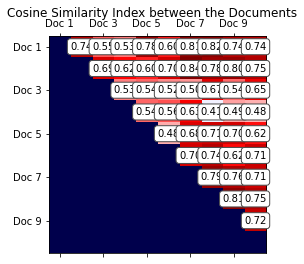

In [26]:
#documents= ['Doc 1', 'Doc 2', 'Doc 3', 'Doc 4', 'Doc 5', 'Doc 6', 'Doc 7', 'Doc 8', 'Doc 9', 'Doc 10']
#print(len(documents))
#documents = list()
#for i in range(1,11):
#    documents.append("Doc " + str(i))
#documents

final_df = pd.DataFrame(np.asarray([[(dic[(x,y)] if (x,y) in dic else 0) for y in documents] for x in documents]))
final_df.columns =  documents
final_df.index = documents 

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(documents)))
ax.set_yticks(np.arange(len(documents)))
ax.set_xticklabels(documents)
ax.set_yticklabels(documents)
ax.matshow(final_df, cmap='seismic')
for (i, j), z in np.ndenumerate(final_df):
  if z != 0 :
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center',
            bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
  else:
    None
fig.suptitle('Cosine Similarity Index between the Documents')
plt.show()

In [27]:
import numpy
data_aff_matrix = final_df + numpy.transpose(final_df)

[4 3 0 2 0 0 0 2 1 0]


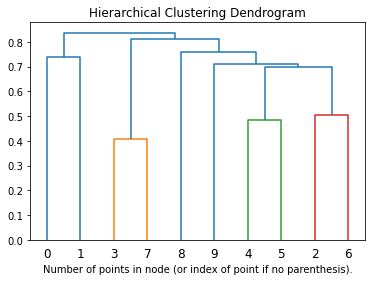

In [57]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(affinity='precomputed', n_clusters=5, linkage='complete').fit(data_aff_matrix)
print(model.labels_)


model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed', linkage='complete').fit(data_aff_matrix)



import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
#plot_dendrogram(model, truncate_mode='level', p=3)
plot_dendrogram(model, truncate_mode='level')
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


